# Match between Rolex clusters and MC influential nodes and PageRank

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

## Load nodes: k = 100

In [ ]:
# Load cluster nodes


In [103]:
CELF_top_k_nodes = [26, 4, 10179, 134, 718, 15439, 27, 8312, 16514, 7020, 407, 4509, 1, 16970, 2760, 6940, 492, 13912, 20718, 16304, 4218, 370, 12899, 7111, 3106, 14565, 4564, 18506, 15436, 5851, 7801, 13139, 5799, 14957, 8591, 64853, 20972, 14803, 11521, 994, 32, 21929, 6982, 17332, 9036, 4514, 9941, 11170, 16131, 6992, 128, 11118, 9903, 17527, 9231, 12159, 14540, 11256, 1597, 30, 9384, 13074, 5669, 15794, 16990, 5064, 14945, 21704, 13820, 18086, 13881, 19837, 13239, 10, 19035, 10390, 9254, 621, 8742, 14131, 15741, 18094, 10340, 18775, 10339, 10276, 10814, 10789, 13511, 15857, 9863, 22382, 6708, 10194, 7234, 6136, 9352, 4344, 9155, 3820]

In [104]:
len(CELF_top_k_nodes)

100

In [95]:
PageRank_top_k_nodes = [88, 26, 1988, 77, 4, 677, 14454, 640, 2342, 8016, 2567, 349, 3571, 8135, 13808, 134, 5226, 27, 3335, 3998, 1343, 11714, 47794, 2320, 1390, 73, 132690, 50901, 4380, 13416, 9964, 12751, 519, 76, 408, 291, 40, 89784, 129960, 39889, 16708, 389, 511, 14440, 19706, 1270, 9914, 718, 26398, 625, 139269, 6241, 46117, 39420, 64911, 13813, 5907, 18938, 244854, 220, 14907, 52497, 1521, 14915, 11355, 15821, 3808, 228, 383, 8, 135913, 7274, 301, 31650, 288958, 126242, 8126, 11539, 99369, 15207, 456, 117680, 510, 185777, 996, 752, 198042, 9762, 48581, 64328, 83432, 69585, 25891, 80, 36795, 10159, 47010, 765, 369, 20461]

## CELF vs PageRank

In [131]:
len(set(CELF_top_k_nodes) & set(PageRank_top_k_nodes))/len(CELF_top_k_nodes)

0.1

## Calculating the fractions

In [128]:
"""Toy example"""

# Nodes from MC and PageRank
MC_nodes = [1,3,5,7]
PageRank_nodes = [3,5,4,9]

# Nodes Rolex clusters
Rolex_nodes_cluster_1 = [1,3,5,6]
Rolex_nodes_cluster_2 = [2,4,7,8]
Rolex_nodes_cluster_3 = [9,10,11,12]

# List of Rolex clusters 
Rolex_clusters = [Rolex_nodes_cluster_1, Rolex_nodes_cluster_2, Rolex_nodes_cluster_3]

In [89]:
# Dictionary to save clusters fraction of match to MC and PageRank
cluster_match = {}

# Count fraction of nodes same for MC and PageRank for each cluster 
for i, cluster in enumerate(Rolex_clusters):
    MC_fraction_same = len(set(cluster) & set(MC_nodes))/len(cluster)
    PageRank_fraction_same = len(set(cluster) & set(PageRank_nodes))/len(cluster)
    cluster_match[i+1] = [1, MC_fraction_same, PageRank_fraction_same]

In [90]:
cluster_match_df = pd.DataFrame.from_dict(cluster_match)
#cluster_match_df = pd.DataFrame.from_dict(cluster_match, orient = 'index')
cluster_match_df

,1,2,3
0,1.00,1.00,1.00
1,0.75,0.25,0.00
2,0.50,0.25,0.25


## Visualization

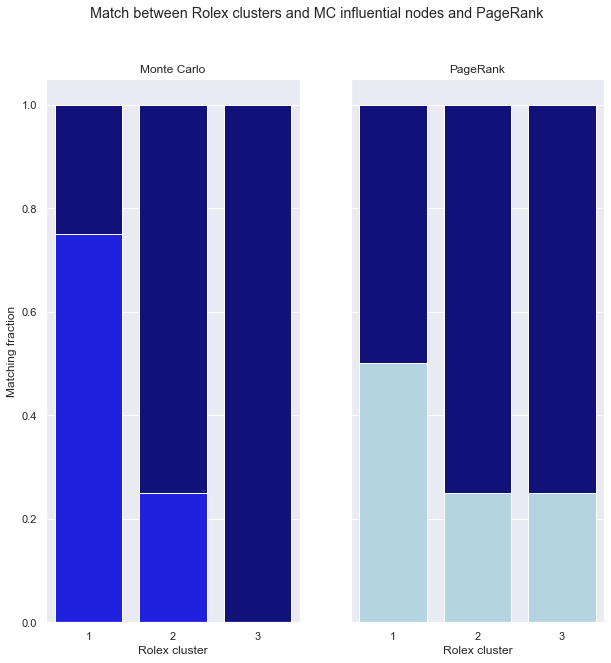

In [100]:
total = pd.DataFrame(cluster_match_df.iloc[0]).T
MC = pd.DataFrame(cluster_match_df.iloc[1]).T
PageRank = pd.DataFrame(cluster_match_df.iloc[2]).T

fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
fig.suptitle('Match between Rolex clusters and MC influential nodes and PageRank')

# MC 
bar1 = sns.barplot(ax=axes[0], data=total, color='darkblue')
bar2 = sns.barplot(ax=axes[0], data=MC, color='blue')
axes[0].set_title("Monte Carlo")

# PageRank
bar1 = sns.barplot(ax=axes[1], data=total, color='darkblue')
bar2 = sns.barplot(ax=axes[1], data=PageRank, color='lightblue')
axes[1].set_title("PageRank")


axes[0].set(xlabel='Rolex cluster', ylabel='Matching fraction')
axes[1].set(xlabel='Rolex cluster')

# show the graph
plt.show()

# Find common features

## Load RoleX features 

In [92]:
spreading_features = pd.read_csv("data/spreading_features.csv")
spreading_features.rename(columns={"Unnamed: 0": "node"}, inplace = True)
spreading_features

,node,external_edges(mean)(mean)(mean)(mean)(mean)(mean)(mean)(mean),external_edges(mean)(mean)(mean)(mean)(mean)(mean)(mean),external_edges(mean)(mean)(mean)(mean)(mean)(mean),external_edges(mean)(mean)(mean)(mean)(mean),in_degree(mean)(mean)(mean)(mean)(mean),external_edges(mean)(mean)(mean)(mean),external_edges(mean)(mean)(mean)(sum),in_degree(mean)(mean)(mean)(mean),in_degree(sum)(mean)(mean)(mean),...,internal_edges(mean),internal_edges(sum),out_degree(sum),total_degree(mean),total_degree(sum),external_edges,in_degree,internal_edges,out_degree,total_degree
0,1,0.370745,0.559823,0.847296,1.224214,1.219500,1.900549,22.806586,2.233415,16.937434,...,2.220019,26.640230,18.120690,4.672605,56.071264,17.820690,2.411494,2.150575,1.850575,4.262069
1,2,0.404920,0.620920,0.978132,1.455130,1.533108,2.229373,71.339931,2.267897,16.122920,...,1.205136,38.564368,27.449425,3.342170,106.949425,25.349425,3.167816,5.300000,3.200000,6.367816
2,3,0.348013,0.542532,0.821582,1.243467,1.400035,1.848926,5.546778,2.051266,17.060422,...,0.333333,1.000000,0.700000,3.500000,10.500000,0.700000,0.200000,0.300000,0.300000,0.500000
3,4,0.327690,0.499998,0.734351,1.121674,1.276565,1.648318,105.492354,1.692854,13.528869,...,1.214889,77.752874,50.422989,4.203538,269.026437,45.148276,14.882759,12.363218,7.088506,21.971264
4,5,0.152267,0.219351,0.331582,0.515192,0.546967,0.753334,3.766671,0.680317,7.885884,...,2.552184,12.760920,6.254023,16.437471,82.187356,6.154023,1.200000,0.600000,0.500000,1.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19220,422665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000
19221,428003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000
19222,433090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000
19223,444546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000


In [93]:
features_df = spreading_features.copy()

In [11]:
features_df.columns

Index(['Unnamed: 0',
       'external_edges(mean)(mean)(mean)(mean)(mean)(mean)(mean)(mean)',
       'external_edges(mean)(mean)(mean)(mean)(mean)(mean)(mean)',
       'external_edges(mean)(mean)(mean)(mean)(mean)(mean)',
       'external_edges(mean)(mean)(mean)(mean)(mean)',
       'in_degree(mean)(mean)(mean)(mean)(mean)',
       'external_edges(mean)(mean)(mean)(mean)',
       'external_edges(mean)(mean)(mean)(sum)',
       'in_degree(mean)(mean)(mean)(mean)', 'in_degree(sum)(mean)(mean)(mean)',
       'internal_edges(mean)(mean)(mean)(mean)',
       'external_edges(mean)(mean)(mean)', 'external_edges(mean)(mean)(sum)',
       'in_degree(mean)(mean)(mean)', 'in_degree(mean)(mean)(sum)',
       'in_degree(sum)(mean)(mean)', 'internal_edges(mean)(mean)(mean)',
       'external_edges(mean)(mean)', 'external_edges(mean)(sum)',
       'in_degree(mean)(mean)', 'in_degree(mean)(sum)', 'in_degree(sum)(mean)',
       'internal_edges(mean)(mean)', 'internal_edges(mean)(sum)',
       'external

In [12]:
most_inter_var = ['external_edges', 'in_degree', 'internal_edges', 'out_degree', 'total_degree']

## Filtered DF for CELF and PageRank

In [105]:
Celf_nodes = CELF_top_k_nodes.copy()
PageRank_nodes = PageRank_top_k_nodes.copy()

In [106]:
CELF_features = spreading_features[spreading_features.node.isin(Celf_nodes)]

In [107]:
CELF_features

,node,external_edges(mean)(mean)(mean)(mean)(mean)(mean)(mean)(mean),external_edges(mean)(mean)(mean)(mean)(mean)(mean)(mean),external_edges(mean)(mean)(mean)(mean)(mean)(mean),external_edges(mean)(mean)(mean)(mean)(mean),in_degree(mean)(mean)(mean)(mean)(mean),external_edges(mean)(mean)(mean)(mean),external_edges(mean)(mean)(mean)(sum),in_degree(mean)(mean)(mean)(mean),in_degree(sum)(mean)(mean)(mean),...,internal_edges(mean),internal_edges(sum),out_degree(sum),total_degree(mean),total_degree(sum),external_edges,in_degree,internal_edges,out_degree,total_degree
0,1,0.370745,0.559823,0.847296,1.224214,1.219500,1.900549,22.806586,2.233415,16.937434,...,2.220019,26.640230,18.120690,4.672605,56.071264,17.820690,2.411494,2.150575,1.850575,4.262069
3,4,0.327690,0.499998,0.734351,1.121674,1.276565,1.648318,105.492354,1.692854,13.528869,...,1.214889,77.752874,50.422989,4.203538,269.026437,45.148276,14.882759,12.363218,7.088506,21.971264
9,10,0.295420,0.425317,0.664652,1.061485,1.173324,1.052300,18.941396,1.042152,9.844598,...,1.077842,19.401149,14.382759,4.142146,74.558621,14.282759,2.100000,1.937931,1.837931,3.937931
23,26,0.278380,0.425829,0.655537,0.971076,1.060521,1.504943,100.831211,1.582459,13.620899,...,1.271745,85.206897,58.200000,4.433110,297.018391,50.885057,16.900000,14.381609,7.066667,23.966667
24,27,0.342799,0.511428,0.766223,1.125711,1.273528,1.855160,77.916713,1.886439,16.168801,...,1.286289,54.024138,36.990805,3.761440,157.980460,34.090805,8.000000,7.183908,4.283908,12.283908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12910,20972,0.085002,0.200547,0.246801,0.182596,0.114024,0.194545,1.167269,0.241910,2.463620,...,0.250000,1.500000,1.500000,0.400000,2.400000,1.500000,0.100000,0.600000,0.600000,0.700000
13345,21704,0.200043,0.290188,0.438746,0.826564,1.062785,0.935544,12.162077,0.817990,8.688033,...,1.772679,23.044828,13.237931,7.643943,99.371264,13.237931,0.100000,1.300000,1.300000,1.400000
13470,21929,0.299066,0.434973,0.678118,0.776084,0.790202,1.110939,15.553142,0.991550,8.547680,...,0.292857,4.100000,3.900000,0.742857,10.400000,3.900000,0.100000,1.400000,1.400000,1.500000
13734,22382,0.556930,0.798258,1.242630,2.043888,2.670057,2.445015,12.225077,2.004988,19.487304,...,0.440000,2.200000,2.100000,0.840000,4.200000,2.100000,0.100000,0.500000,0.500000,0.600000


In [108]:
PageRank_features = spreading_features[spreading_features.node.isin(PageRank_nodes)]

## Visualization

In [67]:
#features = most_inter_var
#fig, ax = plt.subplots(1, 5, figsize=(10, 10))
#for var, subplot in zip(features, ax.flatten()):
#    sns.boxplot(data=pd.DataFrame(features_df[var]), ax=subplot)

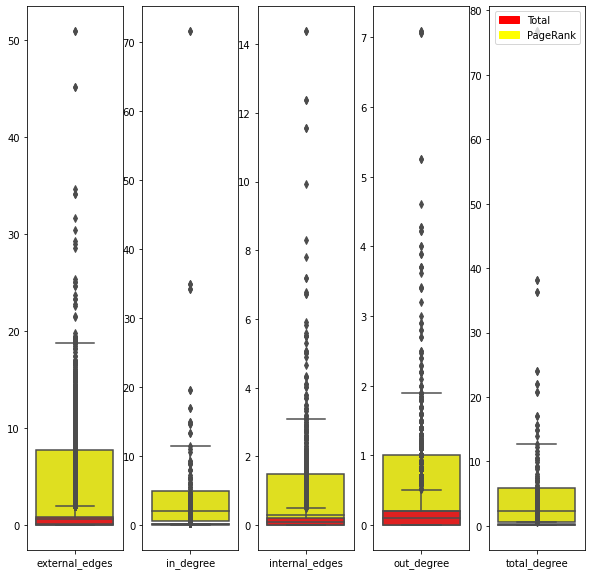

In [80]:
features = most_inter_var
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for var, subplot in zip(features, ax.flatten()):
    sns.boxplot(data=pd.DataFrame(PageRank_features[var]),  ax=subplot, color = "yellow")
    sns.boxplot(data=pd.DataFrame(features_df[var]), ax=subplot, color = "red")

red_patch = mpatches.Patch(color='red', label='Total')
yellow_patch = mpatches.Patch(color='yellow', label='PageRank')
plt.legend(handles=[red_patch, yellow_patch])

plt.show()

In [77]:
#features = most_inter_var
#fig, ax = plt.subplots(1, 10, figsize=(20, 10))
#total_ax = [0,2,4,6,8]
#PageRank_ax = [1,3,5,7,9]
#
#for i, var in enumerate(features):
#    sns.boxplot(data=pd.DataFrame(features_df[var]), ax=ax.flatten()[total_ax[i]], color = "red").set_title('Total')
#    sns.boxplot(data=pd.DataFrame(PageRank_features[var]), ax=ax.flatten()[PageRank_ax[i]], color = "yellow").set_title('PageRank')

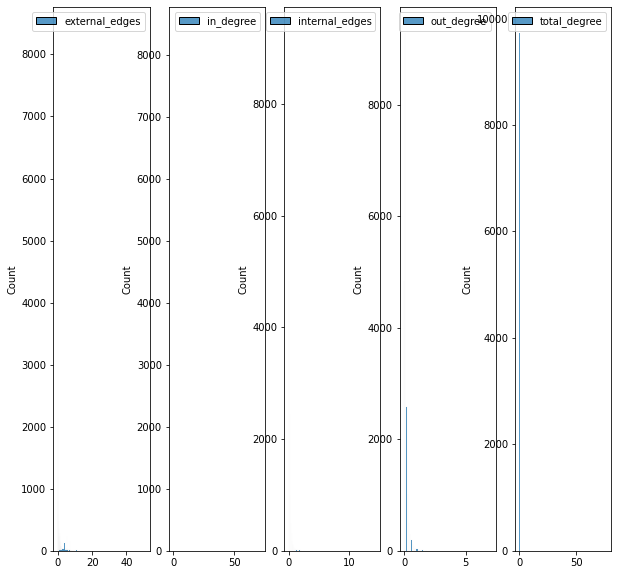

In [82]:
features = most_inter_var
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for var, subplot in zip(features, ax.flatten()):
    sns.histplot(data=pd.DataFrame(features_df[var]), ax=subplot)

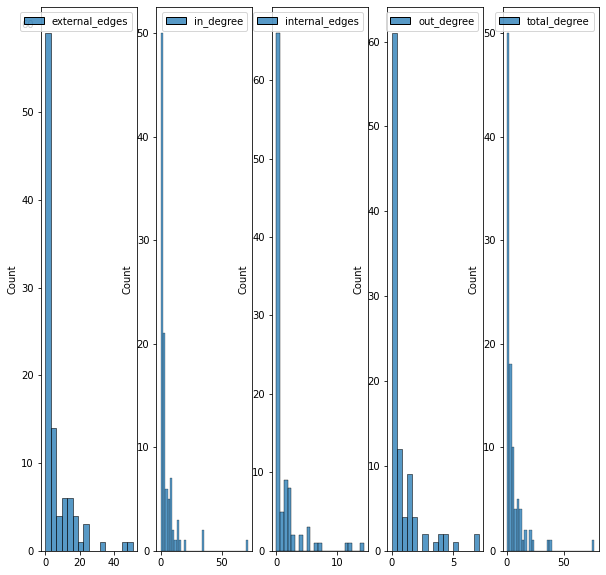

In [35]:
features = most_inter_var
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for var, subplot in zip(features, ax.flatten()):
    sns.histplot(data=pd.DataFrame(PageRank_features[var]), ax=subplot)

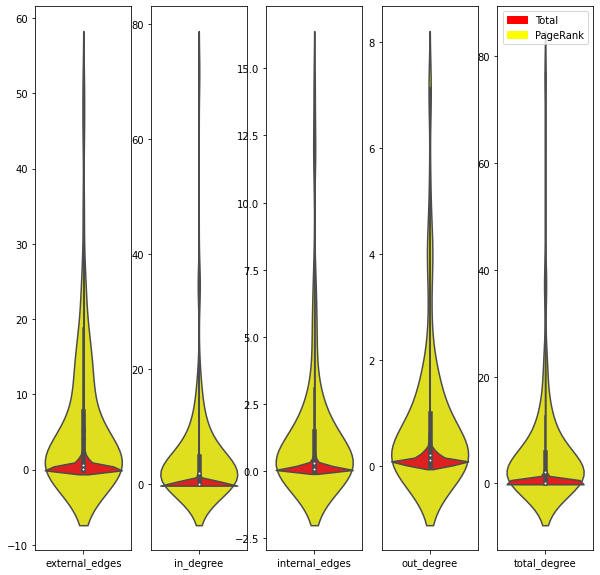

In [78]:
features = most_inter_var
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for var, subplot in zip(features, ax.flatten()):
    sns.violinplot(data=pd.DataFrame(PageRank_features[var]),  ax=subplot, color = "yellow")
    sns.violinplot(data=pd.DataFrame(features_df[var]), ax=subplot, color = "red")

red_patch = mpatches.Patch(color='red', label='Total')
yellow_patch = mpatches.Patch(color='yellow', label='PageRank')
plt.legend(handles=[red_patch, yellow_patch])

plt.show()

In [79]:
#features = most_inter_var
#fig, ax = plt.subplots(1, 10, figsize=(20, 10))
#total_ax = [0,2,4,6,8]
#PageRank_ax = [1,3,5,7,9]
#
#for i, var in enumerate(features):
#    sns.violinplot(data=pd.DataFrame(features_df[var]), ax=ax.flatten()[total_ax[i]], color = "red").set_title('Total')
#    sns.violinplot(data=pd.DataFrame(PageRank_features[var]), ax=ax.flatten()[PageRank_ax[i]], color = "yellow").set_title('PageRank')
#

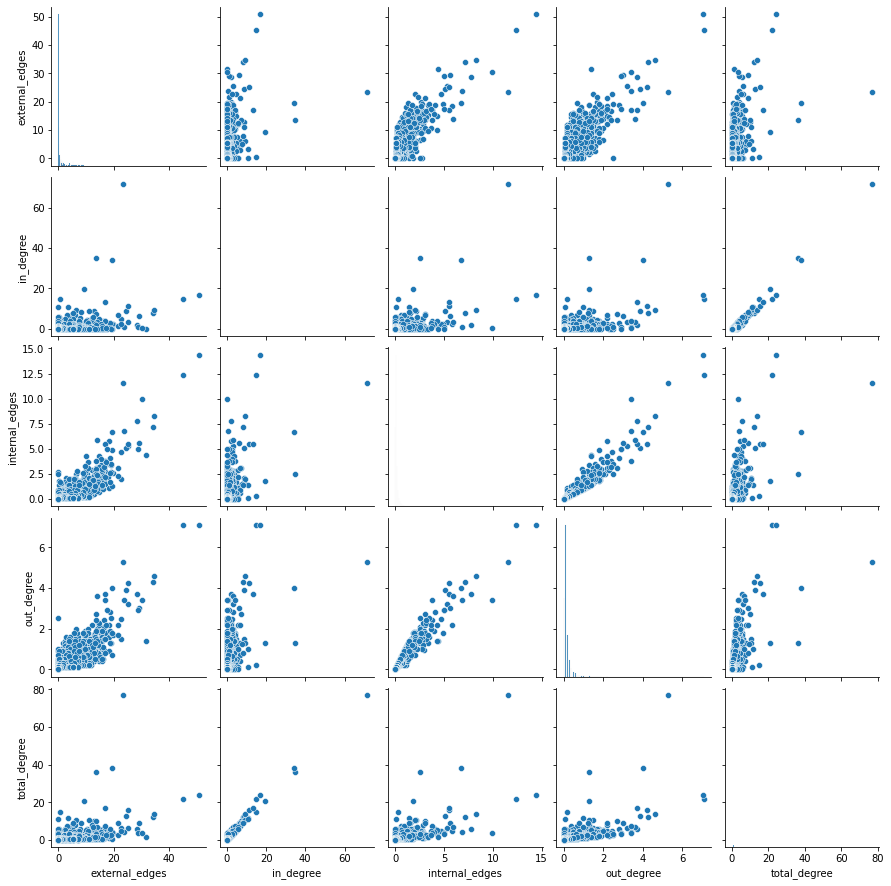

In [16]:
sns.pairplot(features_df[most_inter_var])

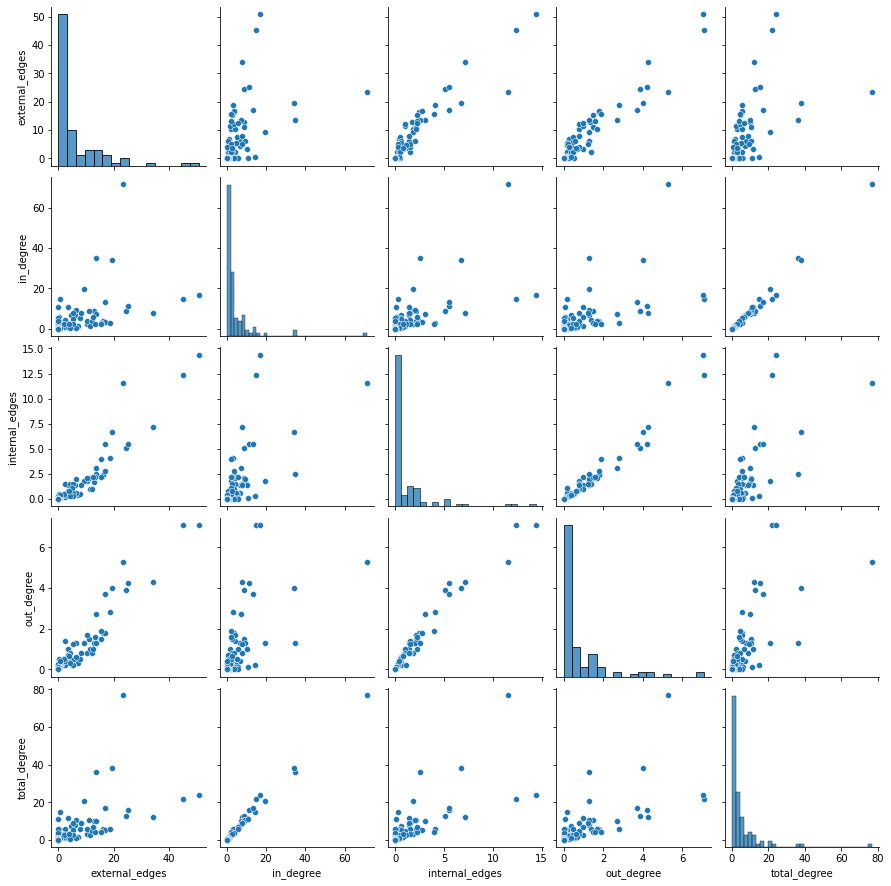

In [84]:
sns.pairplot(PageRank_features[most_inter_var])